In [4]:
'''
author: Felix Hol
date: 2019 June 11
Align bodypart coordinates, translation to put a specific bodypart at origin, rotation along body axis
'''

# import deeplabcut
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import tables
import glob
from sklearn.decomposition import PCA
import pickle

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# plt.style.use('seaborn-dark-palette')

In [ ]:
fileList = glob.glob('/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/*DeepCut_resnet50_moreTest01May6shuffle1_65700.h5')
alignTo = 'bottom'

dfRelRotAll = pd.DataFrame()

for i in fileList:
    dataFile = i
    df = pd.read_hdf(dataFile)
    df.columns = df.columns.droplevel()
    dfRel = df.copy()
    for i in dfRel.columns.levels[0]:
        dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
        dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']
    dfRelRot = dfRel.copy()
    for index, row in dfRelRot.iterrows():
        bodyAngle = getBodyAngle(dfRel, index)
        for i in dfRelRot.columns.levels[0]:
            dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
            dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
    dfRelRotAll = dfRelRotAll.append(dfRelRot, ignore_index=False)


In [ ]:
dfRelRot.head()

In [ ]:
len(dfRelRot)

In [ ]:
dfRelRotAll.head()

In [ ]:
len(dfRelRotAll)

In [5]:
tp13 = pickle.load(open('/home/felix/bloodTaste/190702_SalineNoATP_M3/190702_SalineNoATP_M3_p13_tStats.pkl', 'rb'))

In [21]:
tp13.head()

,y,x,frame,particle,species,age,distance,velocity,bellyWidth,bellyArea,mosqLength
161,953.344484,1805.033304,2108,13,aeg,10,5.386306,53.863061,0.319321,91.0,0.354801
162,828.864385,1630.109225,2109,13,aeg,10,8.899490,88.994904,0.730614,1067.5,1.280313
163,791.945509,1277.308019,2110,13,aeg,10,3.342157,33.421570,0.971834,1367.0,1.227394
164,693.269425,1187.811869,2111,13,aeg,10,0.211122,2.111216,0.746077,2758.0,4.065400
165,701.503434,1189.548563,2112,13,aeg,10,0.627323,6.273233,0.765862,3176.5,4.595173


In [37]:
dataFile = '/home/felix/bloodTaste/190702_SalineNoATP_M3/crops_p13/crops_p13DeepCut_resnet50_moreTest01Jul23shuffle1_244500.h5'
df = pd.read_hdf(dataFile)
df.columns = df.columns.droplevel()
df['','frame'] = ''

In [38]:
df.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p013_f002108.png   531.202203  536.678368   0.001932     355.088587   
crop_p013_f002109.png   323.722659  130.415872   0.999998     177.988463   
crop_p013_f002110.png   409.671329  271.409364   0.995329     410.757370   
crop_p013_f002111.png    42.395634  241.922125   0.993113     462.042801   
crop_p013_f002112.png    40.792792  230.879057   0.997729     459.604755   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p013_f002108.png  550.588627   0.013054   406.112059  531.659137   
crop_p013_f002109.png  415.748822   0.007158   174.368888  417.179939   
crop_p013_f002110.png  271.236332   0.008466   422.780633  427.287758   
crop_p013_f002111.png  161.298153   0.821885   314.269104  553.690274   
crop_p013_f002112.png  153.168528   0.321936   333.389724  523.374021   

bodyparts                        leftForeleg  ...        head              \
coords                likelihood           x  ...           x           y   
crop_p013_f002108.png   0.987742  532.404316  ...  319.263714  212.229055   
crop_p013_f002109.png   0.815549  176.556042  ...  313.065078  252.308461   
crop_p013_f002110.png   0.999572  169.451671  ...  260.988153  285.009033   
crop_p013_f002111.png   0.717738  329.000023  ...  248.295028  221.122396   
crop_p013_f002112.png   0.999988  325.711266  ...  243.826530  217.464195   

bodyparts                            abdomen                         \
coords                likelihood           x           y likelihood   
crop_p013_f002108.png   0.999969  309.243011  300.755631   0.197972   
crop_p013_f002109.png   1.000000  264.931205  298.981797   0.819813   
crop_p013_f002110.png   0.999999  170.760775  347.035663   0.003509   
crop_p013_f002111.png   1.000000  295.019086  312.942742   0.999992   
crop_p013_f002112.png   1.000000  289.071460  309.452062   0.999997   

bodyparts                  bottom                               
coords                          x           y likelihood frame  
crop_p013_f002108.png  302.785949  354.475282   0.229010        
crop_p013_f002109.png  229.693191  315.906744   0.011711        
crop_p013_f002110.png  251.220267  289.509973   0.016966        
crop_p013_f002111.png  340.538394  375.985404   1.000000        
crop_p013_f002112.png  333.414401  369.328141   1.000000        

[5 rows x 31 columns]

In [76]:
i

'crop_p013_f002193.png'

In [66]:
for i in df.index:
    df.loc[i, ('','frame')] = int(i[i.find('_f') + 2 : i.find('.png')])
    

In [67]:
df.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p013_f002108.png   531.202203  536.678368   0.001932     355.088587   
crop_p013_f002109.png   323.722659  130.415872   0.999998     177.988463   
crop_p013_f002110.png   409.671329  271.409364   0.995329     410.757370   
crop_p013_f002111.png    42.395634  241.922125   0.993113     462.042801   
crop_p013_f002112.png    40.792792  230.879057   0.997729     459.604755   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p013_f002108.png  550.588627   0.013054   406.112059  531.659137   
crop_p013_f002109.png  415.748822   0.007158   174.368888  417.179939   
crop_p013_f002110.png  271.236332   0.008466   422.780633  427.287758   
crop_p013_f002111.png  161.298153   0.821885   314.269104  553.690274   
crop_p013_f002112.png  153.168528   0.321936   333.389724  523.374021   

bodyparts                        leftForeleg  ...        head              \
coords                likelihood           x  ...           x           y   
crop_p013_f002108.png   0.987742  532.404316  ...  319.263714  212.229055   
crop_p013_f002109.png   0.815549  176.556042  ...  313.065078  252.308461   
crop_p013_f002110.png   0.999572  169.451671  ...  260.988153  285.009033   
crop_p013_f002111.png   0.717738  329.000023  ...  248.295028  221.122396   
crop_p013_f002112.png   0.999988  325.711266  ...  243.826530  217.464195   

bodyparts                            abdomen                         \
coords                likelihood           x           y likelihood   
crop_p013_f002108.png   0.999969  309.243011  300.755631   0.197972   
crop_p013_f002109.png   1.000000  264.931205  298.981797   0.819813   
crop_p013_f002110.png   0.999999  170.760775  347.035663   0.003509   
crop_p013_f002111.png   1.000000  295.019086  312.942742   0.999992   
crop_p013_f002112.png   1.000000  289.071460  309.452062   0.999997   

bodyparts                  bottom                               
coords                          x           y likelihood frame  
crop_p013_f002108.png  302.785949  354.475282   0.229010  2108  
crop_p013_f002109.png  229.693191  315.906744   0.011711  2109  
crop_p013_f002110.png  251.220267  289.509973   0.016966  2110  
crop_p013_f002111.png  340.538394  375.985404   1.000000  2111  
crop_p013_f002112.png  333.414401  369.328141   1.000000  2112  

[5 rows x 31 columns]

In [81]:
tp13['frame']=tp13['frame'].astype(int)

In [89]:
mdf = tp13.join(df, on=['','frame'], how='inner')

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [83]:
type(df.loc[i,('', 'frame')])

numpy.float64

In [87]:
df.loc[:,('', 'frame')] = df.loc[:,('', 'frame')].astype(int)

In [84]:
type(tp13.frame)

pandas.core.series.Series

In [90]:
dfd = df.copy()
dfd.columns = dfd.columns.droplevel()
mdf = pd.merge(dfd, tp13, on='frame')

In [91]:
mdf.head()

,x_x,y_x,likelihood,x_x,y_x,likelihood,x_x,y_x,likelihood,x_x,...,y_y,x_y,particle,species,age,distance,velocity,bellyWidth,bellyArea,mosqLength
0,531.202203,536.678368,0.001932,355.088587,550.588627,0.013054,406.112059,531.659137,0.987742,532.404316,...,953.344484,1805.033304,13,aeg,10,5.386306,53.863061,0.319321,91.0,0.354801
1,323.722659,130.415872,0.999998,177.988463,415.748822,0.007158,174.368888,417.179939,0.815549,176.556042,...,828.864385,1630.109225,13,aeg,10,8.899490,88.994904,0.730614,1067.5,1.280313
2,409.671329,271.409364,0.995329,410.757370,271.236332,0.008466,422.780633,427.287758,0.999572,169.451671,...,791.945509,1277.308019,13,aeg,10,3.342157,33.421570,0.971834,1367.0,1.227394
3,42.395634,241.922125,0.993113,462.042801,161.298153,0.821885,314.269104,553.690274,0.717738,329.000023,...,693.269425,1187.811869,13,aeg,10,0.211122,2.111216,0.746077,2758.0,4.065400
4,40.792792,230.879057,0.997729,459.604755,153.168528,0.321936,333.389724,523.374021,0.999988,325.711266,...,701.503434,1189.548563,13,aeg,10,0.627323,6.273233,0.765862,3176.5,4.595173


In [92]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 41 columns):
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood    86 non-null float64
x_x           86 non-null float64
y_x           86 non-null float64
likelihood   

In [24]:
alignTo = 'bottom'
dfRel = df.copy()

for i in dfRel.columns.levels[0]:
    dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
    dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']

In [25]:
dfRel.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p015_f002059.png   143.130580  220.511220   0.999982     232.978361   
crop_p015_f002060.png   146.679831  221.017687   0.999978     233.786281   
crop_p015_f002064.png   323.117138  100.969740   0.999939     209.189223   
crop_p015_f002065.png   273.282852   34.266000   0.999997     124.280664   
crop_p015_f002066.png   247.591485   40.825243   0.999996     112.076766   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p015_f002059.png   39.677913   0.982902   234.750881   40.420725   
crop_p015_f002060.png   40.766316   0.999995  -190.742121   29.465723   
crop_p015_f002064.png  -52.260274   0.999999    10.063844 -129.961467   
crop_p015_f002065.png -197.984680   0.999921   -39.123914 -194.952744   
crop_p015_f002066.png -188.380538   0.999043   -64.615026 -186.032283   

bodyparts                        leftForeleg  ...  proboscis        head  \
coords                likelihood           x  ... likelihood           x   
crop_p015_f002059.png   0.003210  -65.064168  ...   0.999999   40.705553   
crop_p015_f002060.png   0.008455  -67.217660  ...   1.000000   60.653603   
crop_p015_f002064.png   0.999996   37.336207  ...   0.999999  107.897026   
crop_p015_f002065.png   0.999997  239.515641  ...   1.000000  151.311347   
crop_p015_f002066.png   0.999998  211.427024  ...   0.999996  151.555116   

bodyparts                                       abdomen                        \
coords                          y likelihood          x          y likelihood   
crop_p015_f002059.png  162.738138        1.0  18.691930  65.841993   0.999999   
crop_p015_f002060.png  148.082151        1.0  22.664011  52.433641   0.999999   
crop_p015_f002064.png  122.106135        1.0  40.970597  46.065351   0.999998   
crop_p015_f002065.png   60.129843        1.0  55.482114  24.787852   1.000000   
crop_p015_f002066.png   58.720998        1.0  56.167594  24.286349   1.000000   

bodyparts             bottom                  
coords                     x    y likelihood  
crop_p015_f002059.png    0.0  0.0        1.0  
crop_p015_f002060.png    0.0  0.0        1.0  
crop_p015_f002064.png    0.0  0.0        1.0  
crop_p015_f002065.png    0.0  0.0        1.0  
crop_p015_f002066.png    0.0  0.0        1.0  

[5 rows x 30 columns]

In [26]:
def getBodyAngle(dfRel, i):
    if dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / dfRel[[('head','x')]].loc[i].values)
        bodyAngle = -1 * bodyAngleRaw
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi - bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi + bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1* (2 * math.pi - bodyAngleRaw)
    return bodyAngle


In [27]:
dfRelRot = dfRel.copy()
for index, row in dfRelRot.iterrows():
#     print(index)
    bodyAngle = getBodyAngle(dfRel, index)
#     print(bodyAngle)
    for i in dfRelRot.columns.levels[0]:
#         print(i)
#         print(dfRel[i, 'x'][index])
        dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
        dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
#         print(bodyAngle)
#         print(dfRel[i, 'x'][index])

In [28]:
dfRelRot.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p015_f002059.png   248.651947  -85.345009   0.999982      95.025086   
crop_p015_f002060.png   260.122476  -51.962372   0.999978     126.336927   
crop_p015_f002064.png   289.618378 -175.273410   0.999939      99.355064   
crop_p015_f002065.png   266.618986  -69.079609   0.999997      42.379554   
crop_p015_f002066.png   245.617536  -51.383557   0.999996      36.447363   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p015_f002059.png -216.387353   0.982902    96.175805 -217.926652   
crop_p015_f002060.png -200.890265   0.999995   -45.030241  187.678084   
crop_p015_f002064.png -191.363107   0.999999   -90.724267  -93.596855   
crop_p015_f002065.png -229.886038   0.999921  -108.354300 -166.723120   
crop_p015_f002066.png -216.148140   0.999043  -127.461421 -150.122278   

bodyparts                        leftForeleg  ...  proboscis        head  \
coords                likelihood           x  ... likelihood           x   
crop_p015_f002059.png   0.003210  227.872949  ...   0.999999  167.751732   
crop_p015_f002060.png   0.008455  209.423737  ...   1.000000  160.022446   
crop_p015_f002064.png   0.999996  230.472817  ...   0.999999  162.946852   
crop_p015_f002065.png   0.999997  311.052063  ...   1.000000  162.821135   
crop_p015_f002066.png   0.999998  285.296308  ...   0.999996  162.533409   

bodyparts                                         abdomen            \
coords                            y likelihood          x         y   
crop_p015_f002059.png  7.105427e-15        1.0  68.409837 -2.156492   
crop_p015_f002060.png -1.421085e-14        1.0  57.111615 -1.098885   
crop_p015_f002064.png  0.000000e+00        1.0  61.648737 -0.199125   
crop_p015_f002065.png  7.105427e-15        1.0  60.714250  2.546061   
crop_p015_f002066.png -7.105427e-15        1.0  61.148074  2.353383   

bodyparts                        bottom                  
coords                likelihood      x    y likelihood  
crop_p015_f002059.png   0.999999    0.0  0.0        1.0  
crop_p015_f002060.png   0.999999    0.0  0.0        1.0  
crop_p015_f002064.png   0.999998    0.0  0.0        1.0  
crop_p015_f002065.png   1.000000    0.0  0.0        1.0  
crop_p015_f002066.png   1.000000    0.0  0.0        1.0  

[5 rows x 30 columns]

In [ ]:
dfRelRotAll.to_csv('DLC_test01.csv')

<Figure size 432x288 with 0 Axes>

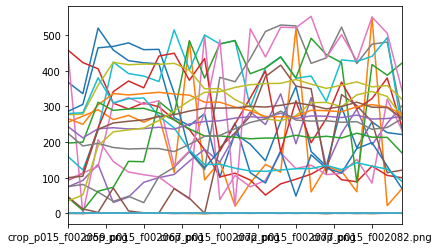

In [30]:
plt.figure()
df.plot(legend=False)

<Figure size 432x288 with 0 Axes>

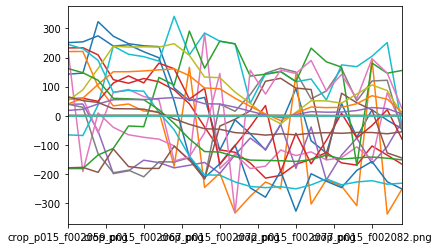

In [31]:
plt.figure()
dfRel.plot(legend=False)

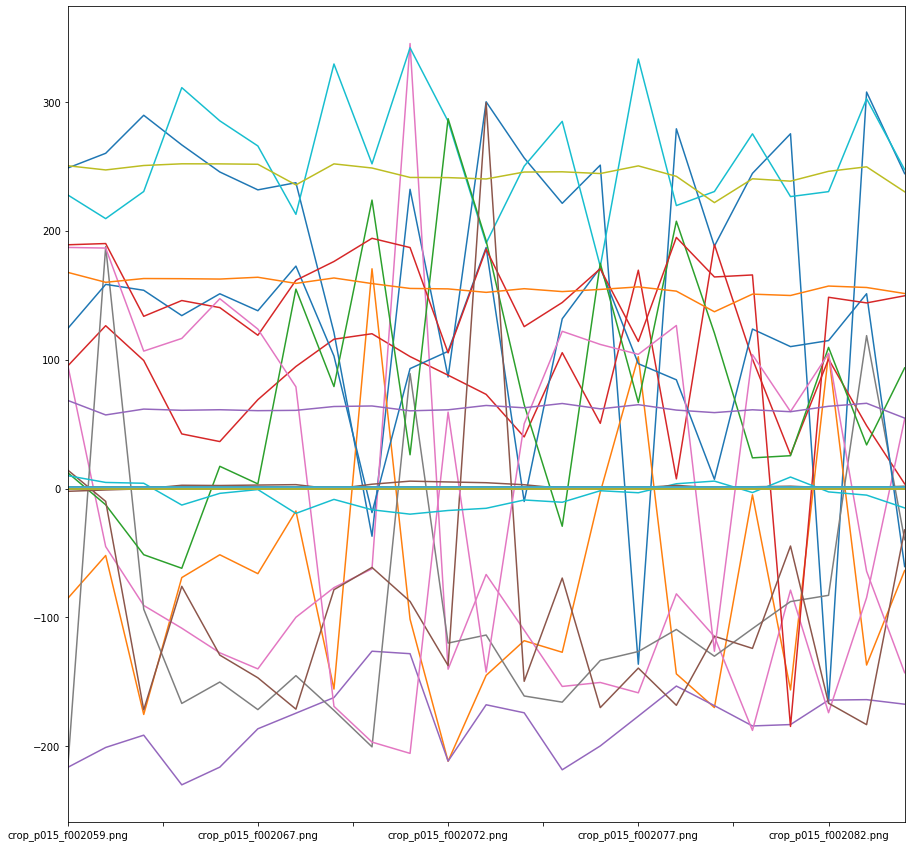

In [32]:
# ax = plt.figure()
ax = dfRelRot.plot(legend=False,figsize=(15,15))
ax.grid(False)
# plt.xlim([190, 380])

In [ ]:
plt.plot(df[[('head','x')]].loc[0], df[[('head','y')]].loc[0],'.r')
plt.plot(df[[('abdomen','x')]].loc[0], df[[('abdomen','y')]].loc[0],'.g')
plt.plot(df[[('bottom','x')]].loc[0], df[[('bottom','y')]].loc[0],'.k')
plt.plot(df[[('rightForeleg','x')]].loc[0], df[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(df[[('leftForeleg','x')]].loc[0], df[[('leftForeleg','y')]].loc[0],'.m')

In [ ]:
plt.plot(dfRel[[('head','x')]].loc[0], dfRel[[('head','y')]].loc[0],'.r')
plt.plot(dfRel[[('abdomen','x')]].loc[0], dfRel[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRel[[('bottom','x')]].loc[0], dfRel[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRel[[('rightForeleg','x')]].loc[0], dfRel[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRel[[('leftForeleg','x')]].loc[0], dfRel[[('leftForeleg','y')]].loc[0],'.m')

In [ ]:
plt.plot(dfRelRot[[('head','x')]].loc[0], dfRelRot[[('head','y')]].loc[0],'.r')
plt.plot(dfRelRot[[('abdomen','x')]].loc[0], dfRelRot[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRelRot[[('bottom','x')]].loc[0], dfRelRot[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[0], dfRelRot[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[0], dfRelRot[[('leftForeleg','y')]].loc[0],'.m')

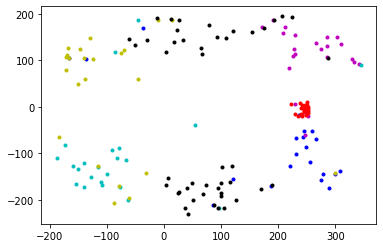

In [33]:
plt.plot(dfRelRot[[('head','x')]].loc[:], dfRelRot[[('head','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('abdomen','x')]].loc[:], dfRelRot[[('abdomen','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('bottom','x')]].loc[:], dfRelRot[[('bottom','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[:], dfRelRot[[('rightForeleg','y')]].loc[:],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[:], dfRelRot[[('leftForeleg','y')]].loc[:],'.m')
plt.plot(dfRelRot[[('rightHindLeg','x')]].loc[:], dfRelRot[[('rightHindLeg','y')]].loc[:],'.c')
plt.plot(dfRelRot[[('leftHindLeg','x')]].loc[:], dfRelRot[[('leftHindLeg','y')]].loc[:],'.y')
plt.plot(dfRelRot[[('rightMiddleLeg','x')]].loc[:], dfRelRot[[('rightMiddleLeg','y')]].loc[:],'.k')
plt.plot(dfRelRot[[('leftMiddleLeg','x')]].loc[:], dfRelRot[[('leftMiddleLeg','y')]].loc[:],'.k')
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'.r')

In [ ]:
plt.plot(dfRelRot[[('head','x')]].loc[:], dfRelRot[[('head','y')]].loc[:],'w')
# plt.plot(dfRelRot[[('abdomen','x')]].loc[:], dfRelRot[[('abdomen','y')]].loc[:],'w')
# plt.plot(dfRelRot[[('bottom','x')]].loc[:], dfRelRot[[('bottom','y')]].loc[:],'w')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[:], dfRelRot[[('rightForeleg','y')]].loc[:],'b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[:], dfRelRot[[('leftForeleg','y')]].loc[:],'m')
# plt.plot(dfRelRot[[('rightHindLeg','x')]].loc[:], dfRelRot[[('rightHindLeg','y')]].loc[:],'c')
# plt.plot(dfRelRot[[('leftHindLeg','x')]].loc[:], dfRelRot[[('leftHindLeg','y')]].loc[:],'y')
# plt.plot(dfRelRot[[('rightMiddleLeg','x')]].loc[:], dfRelRot[[('rightMiddleLeg','y')]].loc[:],'k')
# plt.plot(dfRelRot[[('leftMiddleLeg','x')]].loc[:], dfRelRot[[('leftMiddleLeg','y')]].loc[:],'g')
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'r')

In [ ]:
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'r')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df[[('rightMiddleLeg','x')]], 'c')
plt.plot(df[[('leftMiddleLeg','x')]], 'm')
plt.plot(df[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(df[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(df[[('proboscis','x')]], 'k')
plt.plot(df[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(df[[('abdomen','x')]], 'y')
plt.plot(df[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(dfRel[[('rightMiddleLeg','x')]], 'c')
plt.plot(dfRel[[('leftMiddleLeg','x')]], 'm')
plt.plot(dfRel[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(dfRel[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(dfRel[[('proboscis','x')]], 'k')
plt.plot(dfRel[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(dfRel[[('abdomen','x')]], 'y')
plt.plot(dfRel[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
plt.figure(figsize=(15,11))
plt.plot(dfRelRot[[('rightMiddleLeg','x')]], 'y')
# plt.plot(dfRelRot[[('leftMiddleLeg','x')]], 'm')
# plt.plot(dfRelRot[[('rightHindLeg','x')]], 'm')
plt.plot(dfRelRot[[('rightHindLeg','y')]], 'm')
plt.plot(dfRelRot[[('rightForeleg','x')]], 'c')#, alpha=0.25)
# plt.plot(dfRelRot[[('rightForeleg','y')]], '--m')#, alpha=0.25)
# plt.plot(dfRelRot[[('proboscis','x')]], 'k')
plt.plot(dfRelRot[[('proboscis','y')]], 'k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
# plt.plot(dfRelRot[[('abdomen','x')]], 'y')
# plt.plot(dfRelRot[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'right hind leg, y', 'right foreleg, x', 'proboscis, y'])#, 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
dfRelRot.head()

In [ ]:
print(len(dfRelRot))
print(len(dfRelRotAll))

In [34]:
dfxy  = dfRelRot.drop(columns=['likelihood'], level=1)

In [35]:
dfxy.head()

bodyparts             rightForeleg             rightMiddleLeg              \
coords                           x           y              x           y   
crop_p015_f002059.png   248.651947  -85.345009      95.025086 -216.387353   
crop_p015_f002060.png   260.122476  -51.962372     126.336927 -200.890265   
crop_p015_f002064.png   289.618378 -175.273410      99.355064 -191.363107   
crop_p015_f002065.png   266.618986  -69.079609      42.379554 -229.886038   
crop_p015_f002066.png   245.617536  -51.383557      36.447363 -216.148140   

bodyparts             rightHindLeg             leftForeleg              \
coords                           x           y           x           y   
crop_p015_f002059.png    96.175805 -217.926652  227.872949  124.066316   
crop_p015_f002060.png   -45.030241  187.678084  209.423737  158.416382   
crop_p015_f002064.png   -90.724267  -93.596855  230.472817  153.829404   
crop_p015_f002065.png  -108.354300 -166.723120  311.052063  134.167960   
crop_p015_f002066.png  -127.461421 -150.122278  285.296308  151.124139   

bodyparts             leftMiddleLeg             leftHindLeg              \
coords                            x           y           x           y   
crop_p015_f002059.png     12.366461  189.131816   14.429199  187.067223   
crop_p015_f002060.png    -12.597346  190.090079   -9.944899  186.584694   
crop_p015_f002064.png    -51.341279  133.633831 -171.689461  106.630775   
crop_p015_f002065.png    -61.866032  145.872998  -75.874338  116.464906   
crop_p015_f002066.png     17.250422  140.393480 -129.238247  147.286695   

bodyparts               proboscis                   head                \
coords                          x          y           x             y   
crop_p015_f002059.png  250.463476  10.007594  167.751732  7.105427e-15   
crop_p015_f002060.png  247.201885   4.733803  160.022446 -1.421085e-14   
crop_p015_f002064.png  250.643548   4.104157  162.946852  0.000000e+00   
crop_p015_f002065.png  251.960809 -12.815450  162.821135  7.105427e-15   
crop_p015_f002066.png  251.899755  -3.729197  162.533409 -7.105427e-15   

bodyparts                abdomen           bottom       
coords                         x         y      x    y  
crop_p015_f002059.png  68.409837 -2.156492    0.0  0.0  
crop_p015_f002060.png  57.111615 -1.098885    0.0  0.0  
crop_p015_f002064.png  61.648737 -0.199125    0.0  0.0  
crop_p015_f002065.png  60.714250  2.546061    0.0  0.0  
crop_p015_f002066.png  61.148074  2.353383    0.0  0.0

In [36]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfxy)
pcaDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [37]:
pcaDf.head()

,pca1,pca2
0,-80.484548,-87.769641
1,-120.440239,-126.626789
2,-77.487652,-176.695257
3,-20.593414,-150.379470
4,35.363527,-158.320144


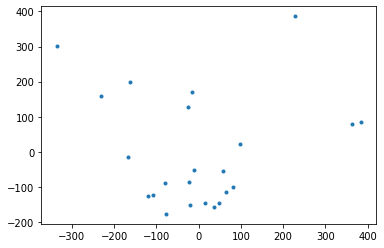

In [38]:
plt.plot(pcaDf.pca1, pcaDf.pca2,'.')

In [ ]:
dfxyall  = dfRelRotAll.drop(columns=['likelihood'], level=1)
pca = PCA(n_components=2)
principalComponentsAll = pca.fit_transform(dfxyall)
pcaDfAll = pd.DataFrame(data = principalComponentsAll, columns = ['pca1', 'pca2'])

In [ ]:
plt.plot(pcaDfAll.pca1, pcaDfAll.pca2,'.')

In [ ]:
dfxyT = dfxy.copy()
dfxyT.columns = dfxyT.columns.droplevel()
dfxyT['label'] = ''

In [ ]:
dfxyT.loc[0:95, 'label'] = 1
dfxyT.loc[95:135, 'label'] = 2
dfxyT.loc[135:220, 'label'] = 3
dfxyT.loc[220:, 'label'] = 2

In [ ]:
y = dfxyT.loc[:,['label']].values

In [ ]:
finalDf = pd.concat([pcaDf, dfxyT[['label']]], axis = 1)

In [ ]:
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['m', 'k', 'c', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , c = color
               , alpha = 0.65
               , s = 50)
ax.legend(['hind leg groom', 'rest', 'proboscis groom'], fontsize=20)
ax.grid(c='lightgray')
ax.set_axis_bgcolor('white')
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18)

In [ ]:
dfxy.head()

In [ ]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

n_neighbors = 15

X = dfxy.copy()
X.columns = dfxy.columns.droplevel()
y = dfxyT['label']

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = dfxy.copy()
X.columns = dfxy.columns.droplevel()
y = dfxyT['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

In [ ]:
y_predict = knn_model.predict(X_test)
y_predict

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen', 3: 'black', 4: 'blue'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8)
#                 label='Species {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

In [ ]:
label

In [ ]:
colors

In [ ]:
dfp = pandas.read_pickle('181206_01_2712-2973DeepCut_resnet50_moreTest01May6shuffle1_65700includingmetadata.pickle')

In [ ]:
dfp.head()

In [ ]:
dfp

In [ ]:
fileList = glob.glob('/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/*DeepCut_resnet50_moreTest01May6shuffle1_65700.h5')

In [ ]:
fileList